## Assignment 1, Dataset 10
## Student Name: Paria Ighanian, Student ID: 0200155529


In [13]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

## (a) How many nodes and edges are there in the networks?


### Facebook - Undirected Graph

In [3]:
# Read the edge list from the file and create the graph
facebook_G = nx.read_edgelist('Facebook-Ego/3437_3.edges', nodetype=int)

# Number of nodes and edges
facebook_num_nodes = facebook_G.number_of_nodes()
facebook_num_edges = facebook_G.number_of_edges()

print(f"Number of nodes: {facebook_num_nodes}")
print(f"Number of edges: {facebook_num_edges}")

Number of nodes: 133
Number of edges: 325


### Twitter - Directed Graph

In [4]:
# Read the edge list from the file and create the graph
twitter_G = nx.read_edgelist('Twitter-Ego/7517222.edges', create_using=nx.DiGraph(), nodetype=int)

# Print the number of nodes and edges
twitter_num_nodes = twitter_G.number_of_nodes()
twitter_num_edges = twitter_G.number_of_edges()

print(f"Number of nodes: {twitter_num_nodes}")
print(f"Number of edges: {twitter_num_edges}")


Number of nodes: 144
Number of edges: 4992


## (b) What are the maximum degree and the average degree of the networks?


### Facebook - Undirected Graph

In [5]:
# Calculate maximum degree
facebook_max_degree = max(dict(facebook_G.degree()).values())

# Calculate average degree
facebook_average_degree = sum(dict(facebook_G.degree()).values()) / facebook_num_nodes

# Print the results
print(f"Maximum Degree: {facebook_max_degree}")
print(f"Average Degree: {facebook_average_degree:.2f}")

Maximum Degree: 26
Average Degree: 4.89


### Twitter - Directed Graph

In [6]:
# Calculate in-degrees and out-degrees
twitter_in_degrees = dict(twitter_G.in_degree())
twitter_out_degrees = dict(twitter_G.out_degree())

# Calculate maximum in-degree and out-degree
twitter_max_in_degree = max(twitter_in_degrees.values())
twitter_max_out_degree = max(twitter_out_degrees.values())

# Calculate average in-degree and out-degree
twitter_average_in_degree = sum(twitter_in_degrees.values()) / twitter_num_nodes
twitter_average_out_degree = sum(twitter_out_degrees.values()) / twitter_num_nodes

# Print the results
print(f"Maximum In-Degree: {twitter_max_in_degree}")
print(f"Maximum Out-Degree: {twitter_max_out_degree}")
print(f"Average In-Degree: {twitter_average_in_degree:.2f}")
print(f"Average Out-Degree: {twitter_average_out_degree:.2f}")

Maximum In-Degree: 89
Maximum Out-Degree: 112
Average In-Degree: 34.67
Average Out-Degree: 34.67


## (c) Extract 5 - 8 nodes from the network and state them as a partial network. What is the adjacency matrix of the partial network? Why do we need adjacency matrix to describe the structure of the network?


### Facebook - Undirected Graph

In [7]:
# Select the first 8 nodes from the original graph
facebook_selected_nodes = list(facebook_G.nodes)[:8]

# Create a subgraph of the selected nodes
facebook_partial_network = facebook_G.subgraph(facebook_selected_nodes)

# Calculate the adjacency matrix
facebook_subgraph_adjacency_matrix = nx.adjacency_matrix(facebook_partial_network)

# Display the results
print("Selected Nodes:", facebook_selected_nodes)
print("Adjacency Matrix:\n", facebook_subgraph_adjacency_matrix.todense())

Selected Nodes: [3826, 3869, 3838, 3804, 3830, 3813, 3764, 3758]
Adjacency Matrix:
 [[0 0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0]
 [1 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0 1]
 [0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0]]


In [34]:
facebook_adjacency_df = nx.to_pandas_adjacency(facebook_partial_network).astype(int)
facebook_adjacency_df

,3813,3758,3826,3764,3830,3804,3869,3838
3813,0,0,0,0,1,0,0,0
3758,0,0,0,1,0,0,0,0
3826,0,0,0,0,0,0,1,0
3764,0,1,0,0,0,0,0,0
3830,1,0,0,0,0,1,0,0
3804,0,0,0,0,1,0,0,1
3869,0,0,1,0,0,0,0,0
3838,0,0,0,0,0,1,0,0


In [35]:
facebook_partial_network.edges()

EdgeView([(3813, 3830), (3758, 3764), (3826, 3869), (3830, 3804), (3804, 3838)])

#### Here there is no direction. so for both matrix\[ i, j \] , matrix\[ j, i \] we have value 1.

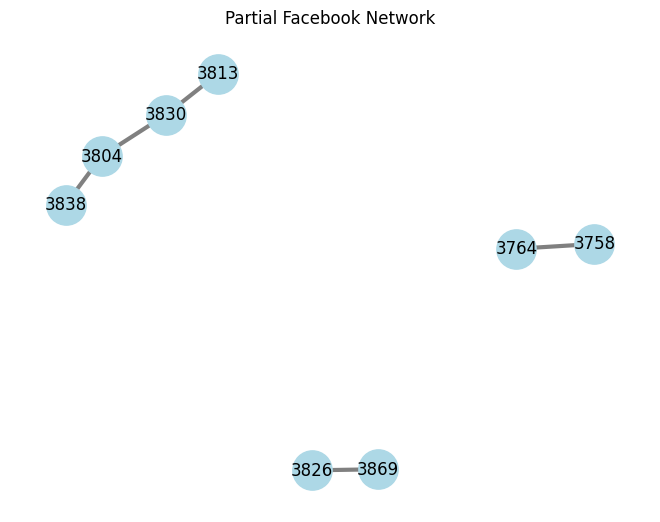

In [8]:
pos = nx.spring_layout(facebook_partial_network, k=0.5, seed=42)  

# Draw the network 
nx.draw(
    facebook_partial_network,
    pos,
    with_labels=True,          
    node_size=800,             
    node_color='lightblue',    
    font_size=12,              
    font_color='black',       
    edge_color='gray',      
    width=3,                  
)

# Show the plot
plt.title("Partial Facebook Network")
plt.show()

### Twitter - Directed Graph

In [9]:
# Select the first 8 nodes from the original directed graph
twitter_selected_nodes = list(twitter_G.nodes)[:8]

# Create a subgraph of the selected nodes
twitter_partial_network = twitter_G.subgraph(twitter_selected_nodes)

# Calculate the adjacency matrix for the directed subgraph
twitter_subgraph_adjacency_matrix = nx.adjacency_matrix(twitter_partial_network)

# Display the results
print("Selected Nodes:", twitter_selected_nodes)
print("Adjacency Matrix:\n", twitter_subgraph_adjacency_matrix.todense())

Selected Nodes: [43971053, 44527648, 89014429, 250831586, 349157263, 299926319, 165188650, 110895343]
Adjacency Matrix:
 [[0 0 0 1 0 0 0 1]
 [0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 1 0]
 [1 1 0 0 0 1 0 0]
 [1 1 0 0 0 1 0 1]
 [1 0 0 1 1 0 1 1]
 [0 0 0 0 0 0 0 0]
 [1 1 0 1 1 1 0 0]]


In [33]:
twitter_adjacency_df = nx.to_pandas_adjacency(twitter_partial_network).astype(int)
twitter_adjacency_df

,44527648,250831586,165188650,43971053,349157263,299926319,110895343,89014429
44527648,0,0,0,1,0,0,0,1
250831586,0,0,0,0,0,0,0,0
165188650,0,1,0,0,0,0,1,0
43971053,1,1,0,0,0,1,0,0
349157263,1,1,0,0,0,1,0,1
299926319,1,0,0,1,1,0,1,1
110895343,0,0,0,0,0,0,0,0
89014429,1,1,0,1,1,1,0,0


#### Here there is a direction. so if there is value 1 in matrix\[ i, j \], that means there is an edge that starts from Node i and goes to Node j.  i -> j

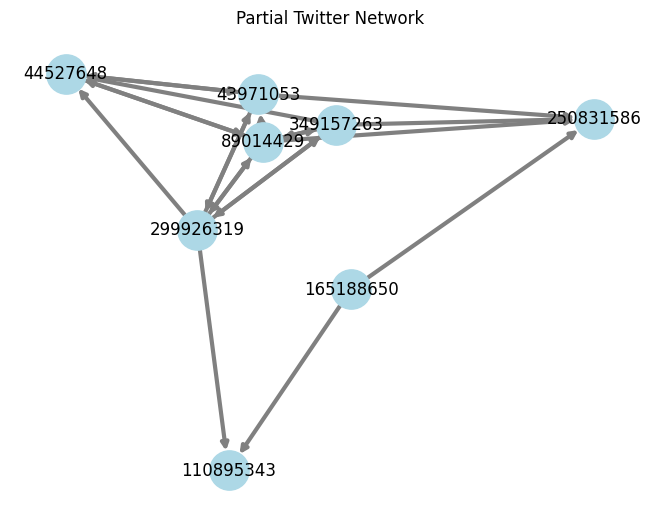

In [11]:
pos = nx.spring_layout(twitter_partial_network, k=0.5, seed=42)  

# Draw the network 
nx.draw(
    twitter_partial_network,
    pos,
arrows=True ,   with_labels=True,          
    node_size=800,             
    node_color='lightblue',    
    font_size=12,              
    font_color='black',       
    edge_color='gray',      
    width=3,                  
)

# Show the plot
plt.title("Partial Twitter Network")
plt.show()


## The adjacency matrix offers a compact and clear representation of a graph's structure, making it easier to analyze connections between nodes.